<a href="https://colab.research.google.com/github/alvinadar/DBSCAN-Project-/blob/main/Finding_K_distance_and_Compute_eps_for_DBSAN_(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suggested eps value by K-distance

In [ ]:
!pip install kneed

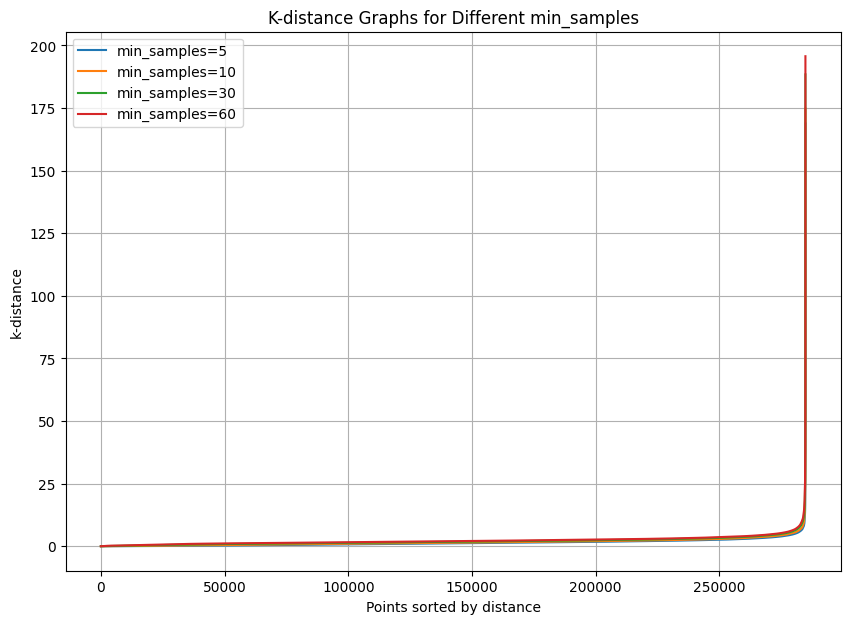

Suggested eps values: {5: np.float64(18.866415025063297), 10: np.float64(27.5563598209801), 30: np.float64(36.207269656757354), 60: np.float64(40.69993556454931)}


In [ ]:
# =========================
# 1. Import libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# =========================
# 2. Load dataset
# =========================
# Change the path if your dataset is stored elsewhere
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# Drop 'Time' (not useful for clustering), keep features
X = df.drop(columns=["Time", "Class"])
y = df["Class"]  # Keep labels for evaluation later

# =========================
# 3. Scale features
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# 4. Function to compute k-distance & eps suggestions
# =========================
def compute_k_distances(X, min_samples_list=[5,10,30,60]):
    plt.figure(figsize=(10,7))
    eps_suggestions = {}

    for min_samples in min_samples_list:
        # Compute nearest neighbors
        neighbors = NearestNeighbors(n_neighbors=min_samples)
        distances, _ = neighbors.fit(X).kneighbors(X)

        # Take k-th NN distance (last column), then sort
        k_distances = np.sort(distances[:, -1])

        # Plot curve
        plt.plot(k_distances, label=f"min_samples={min_samples}")

        # Find "knee" point
        kneedle = KneeLocator(
            range(len(k_distances)),
            k_distances,
            curve="convex",
            direction="increasing"
        )
        if kneedle.knee is not None:
            eps_value = k_distances[kneedle.knee]
            eps_suggestions[min_samples] = eps_value
        else:
            eps_suggestions[min_samples] = None

    # Plot formatting
    plt.title("K-distance Graphs for Different min_samples")
    plt.xlabel("Points sorted by distance")
    plt.ylabel("k-distance")
    plt.grid(True)
    plt.legend()
    plt.show()

    return eps_suggestions

# =========================
# 5. Run the function
# =========================
eps_suggestions = compute_k_distances(X_scaled, [5,10,30,60])
print("Suggested eps values:", eps_suggestions)

# Suggested eps value is 18 (max value) for min_samples 5, its based on K-distance plot. But is the upper bound of eps value. That's the maximum value and it will create a big cluster. So, we have to compare with F1 score and Silhouette score to justify which is the corret eps value and min_sample.